## **Introdução ao TATHU (Tracking and Analysis of Thunderstorms)**:
---

##OBJETIVO:** Esta segunda parte prática do curso tem como objetivo ensinar instalação e algumas funcionalidades da biblioteca TATHU: https://github.com/uba/tathu
---

##**EMENTA**: Serão abordados os seguintes tópicos

1. Instalação e Teste do TATHU,
2. Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16
3. Detecção, Caracterização e Rastreio dos Sistemas Convectivos
4. Armazenando os Resultados
5. Leitura e Exploração dos Resultados
6. Analisando o Sistema Convectivo Detectado com Dados do Sensor GLM
7. Testando uma Previsão


"**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos serão realizados nesse código:

**1° Passo:** Instalação e Teste do TATHU

**2° Passo:** Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16

**3° Passo:** Detecção, Caracterização e Rastreio dos Sistemas Convectivos
  
**4° Passo:** Armazenando os Resultados

**5° Passo:** Leitura e Exploração dos Resultados
  
**6° Passo:** Testando uma Previsão

##**1° Passo**: Instalação e Teste do TATHU (Tracking and Analysis of Thunderstorms)

##Para utilizar o pacote TATHU, é necessário instalar as dependências necessárias além do próprio TATHU. No ambiente do Google Colab, uma forma mais prática de instalar pacotes é a partir do gerenciador de pacotes condacolab, que será instalado no comando abaixo.

Os comandos abaixo instalam as dependências necessárias

> *este comando pode levar um tempo para ser concluído (~2 min)*

In [1]:
!apt-get install libsqlite3-mod-spatialite
!pip install s3fs
!pip install aenum
!pip install cartopy
!pip install geopandas
!pip install netCDF4
!pip install opencv-python
!pip install pathos
!pip install psycopg2
!pip install pyproj
#!pip install proj==9.2.0
!pip install rasterstats
!pip install requests
!pip install rtree
!pip install scikit-image
!pip install scipy
!pip install tqdm
!pip install pyyaml
print('>> Done!')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libsqlite3-mod-spatialite
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,176 kB of archives.
After this operation, 8,933 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 libsqlite3-mod-spatialite amd64 5.1.0-1~jammy0 [2,176 kB]
Fetched 2,176 kB in 3s (657 kB/s)
Selecting previously unselected package libsqlite3-mod-spatialite:amd64.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../libsqlite3-mod-spatialite_5.1.0-1~jammy0_amd64.deb ...
Unpacking libsqlite3-mod-spatialite:amd64 (5.1.0-1~jammy0) ...
Setting up libsqlite3-mod-spatialite:amd64 (5.1.0-1~jammy0) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libur_loader.so.0 is not a symbolic link

/sbin/l

Enfim, o pacote TATHU é instalado com os comandos abaixo.

In [2]:
!git clone https://github.com/uba/tathu.git
%cd tathu/
!python -m pip install --no-deps -e .

Cloning into 'tathu'...
remote: Enumerating objects: 1216, done.
remote: Counting objects: 100% (457/457), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 1216 (delta 317), reused 367 (delta 255), pack-reused 759 (from 1)
Receiving objects: 100% (1216/1216), 24.63 MiB | 30.42 MiB/s, done.
Resolving deltas: 100% (696/696), done.
/content/tathu
Obtaining file:///content/tathu
  Preparing metadata (setup.py) ... done
  Running setup.py develop for tathu


Com o pacote instalado, basta importá-lo para o ambiente de execução.

In [3]:
import tathu
print('Version', tathu.__version__)

from tathu.logo import TATHU_BANNER
print(TATHU_BANNER)

Version 0.1.0

                                       ,,,,,,,                   ▄▄███▄
                              ,▄▄███████▀▀▀▀▀▀██████▄▄▄        ▄██▀  ▀████████,
                         ,▄████▀▀'                 `▀▀▀███▄,  ███     ▐██   ██▌
                      ▄███▀▀                             ▀▀█████       ██  ╓██'
                   ╓███▀                                    `███      ███,▄██
                 ▄██▀'                                      ▐████▄ ,▄█████▀"
               ▄██▀                                         ▀██`████████▄
              ▄██       ▄▄▄▄▄▄ ╔▄▄▄ ▄▄▄▄▄▄L▄▄  ▄▄L╔▄▄  ▄▄    ███      '▀███▄
             ▄██        "▐██"",████▄'"██▌" ██▄▄██▌▐█▌  ██     ▀██▄       `▀██▄
            ▐██           ██  ██████µ ██▌  ██▀▀██▌▐██▄▄██       ██▌     ▄▄  ▀██▄
            ██▌           ▀▀ ╙▀▀  "▀▀ ▀▀`  ▀▀  ▀▀▀ "▀▀▀▀                ██    ▀██
        ▄▄████▌                                                  ▄▄            ▀██▄
     ,███▀` ╙██▄                         

# **2° Passo:** Obtenção, Visualização e Remapeamento de Dados do Satélite GOES-16

### **Download de Imagens GOES-16**

Utilizando o suporte fornecido pelo TATHU, vamos realizar o download de um conjunto de dados do satélite GOES-16. Mais especificamente, utilizaremos o canal 13 (10,35 µm) do setor *full-disk* (disco hemisférico completo) do sensor ABI (*Advanced Baseline Imager*, Imageador Avançado de Base) entre 12 e 15 UTC do dia 30 de Abril de 2024. Essas imagens serão utilizadas para a detecção e rastreio dos objetos de interesse, os **Sistemas Convectivos (SC)**.

In [4]:
# Import the libraries
from datetime import datetime
from tathu.downloader.goes import AWS
from tathu.progress import TqdmProgress

# Download 30 April 2024, Channel 13 for 12, 13, 14 and 15 hours UTC
start = end = datetime.strptime('20240430', '%Y%m%d')
hours = ['12', '13', '14', '15']

# From AWS (full-disk)
AWS.download(AWS.buckets['GOES-16'],
             ['ABI-L2-CMIPF'],
             start,
             end,
             hours,
             ['13'],
             './goes16-aws',
             progress=TqdmProgress('Download GOES-16 data (AWS)', 'files'))

/content/tathu/tathu/utils.py:31: SyntaxWarning: invalid escape sequence '\p'
  \param x The spatial x-coordiante.
/content/tathu/tathu/utils.py:43: SyntaxWarning: invalid escape sequence '\p'
  \param geoTransform A list of 6 coefficients describing an affine transformation to georeference a grid.
/content/tathu/tathu/utils.py:68: SyntaxWarning: invalid escape sequence '\d'
  def extractPeriods(files, timeout, regex='\d{12}', format='%Y%m%d%H%M'):
/content/tathu/tathu/utils.py:93: SyntaxWarning: invalid escape sequence '\d'
  def file2timestamp(path, regex='\d{12}', format='%Y%m%d%H%M'):
/usr/local/lib/python3.12/dist-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(
Download GOES-16 data (AWS): 100%|██████████| 24/24 [00:33<00:00,  1.40s/files]


### **Verificando a Lista de Arquivos Obtidos**

Com os dados baixados, vamos realizar uma busca no sistema de arquivos para definir uma lista de dados (arquivos do tipo NetCDF) que serão utilizados nos processos de detecção e rastreio.

In [5]:
# Import the library
import glob

# List download files
files = sorted(glob.glob("./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/*/*/*.nc"))
for f in files:
  print(f)

./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211200205_e20241211209524_c20241211210005.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211210205_e20241211219526_c20241211219583.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211220205_e20241211229525_c20241211230008.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211230205_e20241211239524_c20241211239570.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211240205_e20241211249524_c20241211250002.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/12/OR_ABI-L2-CMIPF-M6C13_G16_s20241211250205_e20241211259524_c20241211259590.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/13/OR_ABI-L2-CMIPF-M6C13_G16_s20241211300205_e20241211309524_c20241211309588.nc
./goes16-aws/noaa-goes16/ABI-L2-CMIPF/2024/121/13/OR_ABI-L2-CMIPF-M6C13_G16_s20241211310205_e20241211319524_c20

### **Visualizando o Setor Full-Disk**

Para exemplificar o tipo de dado que estamos trabalhando, vamos visualizar a imagem do dia 30 de Abril de 2024 às 00:00 UTC. Tratam-se de imagens no infravermelho termal, posicionado em uma região de janela atmosférica (em 10,35 µm). O setor *full-disk* refere-se ao imageamento de um Polo a outro da Terra, dentro dos limites de longitude estabelecidos pela posição do satélite geoestacionário.

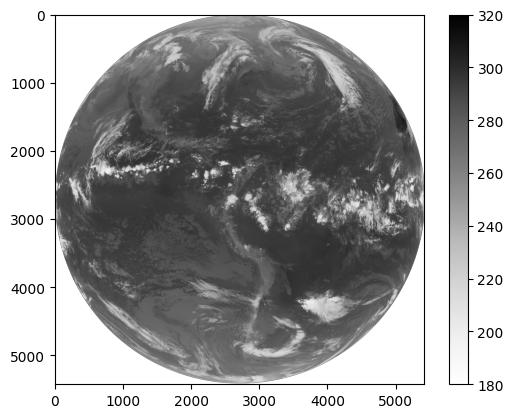

In [6]:
# Import the libraries
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Visualize first file
path = files[0]

# Open netCDF file and show full-disk data
nc = Dataset(path)
data = nc.variables['CMI'][:]
plt.imshow(data, cmap='Greys', vmin=180.0, vmax=320.0)
plt.colorbar()
nc.close()

### **Remapeamento para Grade Regular**

Para o processo de detecção e rastreio, precisamos remapear o dado  *full-disk* para uma grade regular. Essa operação pode ser realizada a partir do suporte fornecido pelo TATHU. Precisamos fornecer a região geográfica desejada (`extent`) e a resolução espacial que iremos trabalhar (em quilômetros) (`resolution`). Aqui, faremos o remapeamento dos dados para a região geográfica que destaca a **região Sul do Brasil**, na resolução de 2 km.

Nota: o parâmetro `extent` é uma lista de 4 valores que indicam  as coordenadas dos cantos inferior esquerdo (`ll - lower left`) e superior direito (`ur - upper right`) da região geográfica. A ordem correta dos valores `extent` é:

```
extent = [llx, lly, urx, ury]
```

Onde:
-  `llx`: longitude mínima
-  `lly`: latitude mínima
-  `urx`: longitude máxima
-  `ury`: latitude máxima

/content/tathu/tathu/satellite/goes16.py:19: SyntaxWarning: invalid escape sequence '\d'
  DATE_REGEX = '\d{14}'


Remapping


/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Do

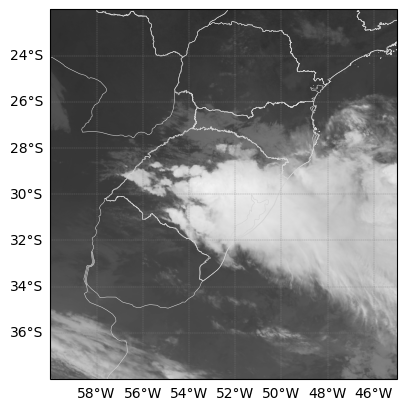

In [7]:
# Import the libraries
import cartopy
from osgeo import gdal
from tathu.constants import LAT_LON_WGS84
from tathu.satellite import goes16

# Geographic area of regular grid [llx, lly, urx, ury], where ll=lower-left, ur=upper-right
extent = [-60.00, -38.00, -45.00, -22.00]

 # Grid resolution (kilometers)
resolution = 2.0

print('Remapping')
grid = goes16.sat2grid(path, extent, resolution, LAT_LON_WGS84, 'HDF5', progress=gdal.TermProgress_nocb)

# Visualize regular grid result
from tathu.visualizer import MapView

m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.show()

# **3° Passo:** Detecção, Caracterização e Rastreio dos Sistemas Convectivos

### **Detecção Utilizando Limiarização**

Vamos agora realizar a **detecção** dos SCs utilizando um processo de limiarização, implementado na classe `detector.LessThan`.

Para isso, é necessário definir alguns parâmetros de configuração:

* `threshold` - Valor máximo de temperatura de brilho (210K).
* `minarea` - Área mínima de detecção (3000 km$^2$) para cada SC.

In [8]:
# import the library
from tathu.tracking.utils import area2degrees

# Threshold value
threshold = 210 # Kelvin. Equivalante a -63.15 graus Celsius

# Define minimum area
minarea = 3000 # km^2

# Convert to degrees^2
minarea = area2degrees(minarea)

Realizamos o processo de deteção a partir da classe `detector.LessThan`:

In [9]:
# import the library
from tathu.tracking import detectors

# Create detector
detector = detectors.LessThan(threshold, minarea)

# Searching for systems
print('Searching for systems...')
systems = detector.detect(grid)
print('# Number of detected systems:', len(systems))

Searching for systems...
# Number of detected systems: 2


Os limites geográficos de cada SC detectado (em vermelho) podem ser visualizados a partir do seguinte trecho de código:

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


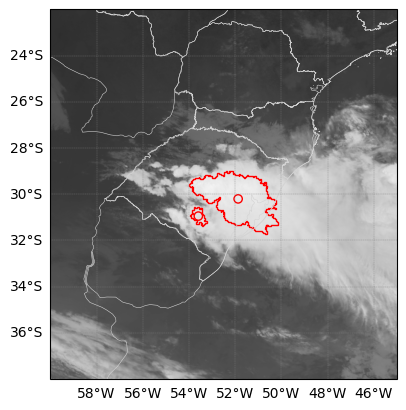

In [11]:
m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.plotSystems(systems, facecolor='none', edgecolor='red', centroids=True)
m.show()

### **Extração de Atributos**

Uma vez definidos os limites geográficos de cada SC, podemos extrair uma série de atributos para cada objeto de interesse.

Neste caso, pode-se considerar atributos espectrais (medidas de um sensor em diferentes canais), análises estatísticas (média, variância, etc) e de forma (tamanho, orientação, retangularidade), entre outros.

Neste exemplo, vamos extrair atributos estatísticos para cada SC, incluindo valor mínimo, médio e desvio padrão de temperatura de brilho, além do número de pixels que compõe determinado sistema - attrs = ['min', 'mean', 'std', 'count'].

Essa operação é realizada pela classe descriptors.StatisticalDescriptor.

In [12]:
# import the library
from tathu.tracking import detectors

# Create detector
detector = detectors.LessThan(threshold, minarea)

# Searching for systems
print('Searching for systems...')
systems = detector.detect(grid)
print('# Number of detected systems:', len(systems))

# Attributes that will be computed
attrs = ['min', 'mean', 'std', 'count', 'nae']

# Silence some warnings in order to improve visualization
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings('ignore', category=ShapelyDeprecationWarning)
from tathu.tracking import descriptors

# Create statistical descriptor
descriptor = descriptors.StatisticalDescriptor(rasterOut=True)

# Describe systems (stats)
descriptor.describe(grid, systems)

for s in systems:
  s.attrs['nae'] = 0

# Visualize attributes
for s in systems:
  print(s.name, s.attrs)

Searching for systems...
# Number of detected systems: 2
41e36a41-b962-4192-8756-8a39af8ff348 {'touching_left': False, 'touching_right': False, 'touching_up': False, 'touching_down': False, 'min': 205.09078979492188, 'mean': 208.3795334994463, 'count': 903, 'std': 1.1271473351287902, 'nae': 0}
5d9dc683-de15-4c55-8338-b1bc57593021 {'touching_left': False, 'touching_right': False, 'touching_up': False, 'touching_down': False, 'min': 192.5543212890625, 'mean': 205.22985213612506, 'count': 17719, 'std': 3.211886066019423, 'nae': 0}


### **Função para Detecção e Extração de Atributos**

Compreendidos os conceitos de remapeamento, deteção e extração de atributos (i.e. caracterização), vamos agora definir uma função auxiliar em Python para realizar essas operações dado um caminho de arquivo - `path`.

Chamaremos a função de `detect`, definida a seguir. A função retorna ao final uma lista de objetos que representam cada SC.


In [13]:
from tathu.utils import file2timestamp

def detect(path, grids=None):

  # Extract time from file-name
  timestamp = file2timestamp(path, regex=goes16.DATE_REGEX, format=goes16.DATE_FORMAT).replace(microsecond=0)

  print('Processing', timestamp)

  # Remap data
  grid = goes16.sat2grid(path, extent, resolution, LAT_LON_WGS84, 'HDF5', progress=gdal.TermProgress_nocb)

  # Create detector
  detector = detectors.LessThan(threshold, minarea)

  # Searching for systems
  print('Searching for systems...')
  systems = detector.detect(grid)
  print('# Number of detected systems:', len(systems))

  # Adjust timestamp for each system
  for s in systems:
    s.timestamp = timestamp

  # Create statistical descriptor
  descriptor = descriptors.StatisticalDescriptor(rasterOut=True)

  # Describe systems (stats)
  descriptor.describe(grid, systems)

  for s in systems:
    s.attrs['nae'] = 0

  if grids is not None:
    # Store remapped image
    grids.append(grid)
  else:
    # Free resources
    grid = None

  return systems

Agora podemos utilizar essa função de modo prático para cada arquivo de imagem.

Por exemplo, para a primeira imagem da lista temos:

In [14]:
systems = detect(files[0])

Processing 2024-04-30 12:00:20
Searching for systems...
# Number of detected systems: 2


## **Rastreio Utilizando Sobreposição de Áreas**

Definida a função `detect` capaz de detectar e extrair os atributos dos SC para cada instante de tempo, vamos agora tratar da **associação** desses elementos no tempo (i.e. **acompanhamento**, **rastreio automático**).

A etapa de rastreio serve para determinar como os objetos de interesse se comportaram no intervalo de tempo ∆t decorrido
entre duas imagens. Nessa etapa, os processos de detecção e caracterização também são utilizados. Em síntese, o rastreio deve ser capaz de determinar quais objetos da observação anterior ainda estão presentes no instante t (associação) e também identificar novos objetos que surgiram.

Como exemplo, o rastreio pode ser realizado a partir da relação topológica entre os SC em conjunto com a análise das áreas de interseção.

![https://tathu.readthedocs.io/en/latest/split.merge.html](https://raw.githubusercontent.com/uba/tathu/master/docs/sphinx/img/system-events.png)

A figura acima mostra situações consideradas durante o rastreio dos SC a partir do critério de interseção de área mínima: (a) continuidade, (b) separação (*split*) e (c) fusão (*merge*). As linhas tracejadas representam os sistemas no instante t−∆t.

Vamos utilizar a classe tracker.OverlapAreaTracker do TATHU para realizar o rastreio considerando imagens de dois instantes de tempo distintos e consecutivos: 00:00 UTC e 00:10 UTC. Uma sobreposição de pelo menos 10% da área é necessária para definir que os SCs são o mesmo elemento se propagando no tempo.

Processing 2024-04-30 12:00:20
Searching for systems...
# Number of detected systems: 2
Processing 2024-04-30 12:10:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
CONTINUITY 1


/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


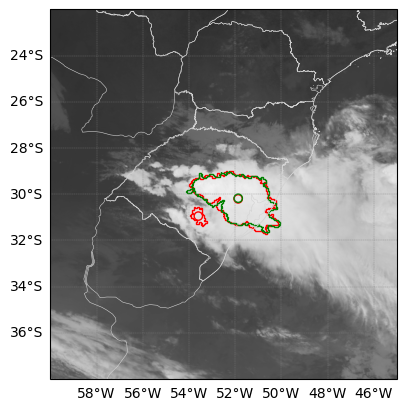

In [15]:
# Import the function
from tathu.tracking import trackers

# Define overlap area criterion
overlapAreaCriterion = 0.1 # 10%

systems_00_00_UTC = detect(files[0]) # previous
systems_00_10_UTC = detect(files[1]) # current

# Create overlap area strategy
strategy = trackers.RelativeOverlapAreaStrategy(overlapAreaCriterion)

#  Let's track!
print('Tracking...')
t = trackers.OverlapAreaTracker(systems_00_00_UTC, strategy=strategy)
t.track(systems_00_10_UTC)
print('done!')

# Let's see the defined relations for each current system
for system in systems_00_10_UTC:
  print(system.event, len(systems_00_10_UTC))

# Add plot to show this initial tracking?
m = MapView(extent, references=['https://github.com/evmpython/minicurso_nowcasting_CPAM2024/raw/main/shapefiles/BR_UF_2019.shp'])
m.plotImage(grid, cmap='Greys', vmin=180.0, vmax=320.0)
m.plotSystems(systems_00_00_UTC, facecolor='none', edgecolor='red', centroids=True)
m.plotSystems(systems_00_10_UTC, facecolor='none', edgecolor='green', centroids=True)
m.show() # add more references

De modo mais generalizado, podemos realizar o rastreio considerando todo o conjunto de imagens:

In [16]:
# Import the function
from tathu.tracking import trackers

# List that store detected systems
systems = []

# List that store remapped images
grids = []

# Prepare tracking...
previous = None

# Define overlap area criterion
overlapAreaCriterion = 0.1 # 10%

# Create overlap area strategy
strategy = trackers.RelativeOverlapAreaStrategy(overlapAreaCriterion)

# for each image file
for f in files:

  # Detect current systems
  current = detect(f, grids)

  # Store
  systems.append(current)

  if previous is None:
    previous = current
    continue

  # Let's track!
  print('Tracking...')
  t = trackers.OverlapAreaTracker(previous, strategy=strategy)
  t.track(current)
  print('done!')

  # Compute normalized area expansion attribute
  descriptor = descriptors.NormalizedAreaExpansionDescriptor()
  descriptor.describe(previous, current)

  # Prepare next iteration
  previous = current

Processing 2024-04-30 12:00:20
Searching for systems...
# Number of detected systems: 2
Processing 2024-04-30 12:10:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 12:20:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 12:30:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 12:40:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 12:50:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 13:00:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 13:10:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 13:20:20
Searching for systems...
# Number of detected systems: 1
Tracking...
done!
Processing 2024-04-30 13:30:20
Searching for systems...
# Number

Feito isso, a lista `systems` é populada com todos os sistemas convectivos rastreados.

In [17]:
print(systems)

[[<tathu.tracking.system.ConvectiveSystem object at 0x79a5595dc470>, <tathu.tracking.system.ConvectiveSystem object at 0x79a559656600>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5595d53d0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a598b5acc0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5599e25d0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a598b4f4d0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a587242720>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a55950acc0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a559565070>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5c5c31a00>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5599f0860>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5599e0fb0>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a559938590>], [<tathu.tracking.system.ConvectiveSystem object at 0x79a5599f03e0>, <tathu.tracking.system.ConvectiveSys

Verificando cada sistema e seus atributos, com destaque para o identificador único (`name`), os atributos escalares (`attrs`) e a geometria espacial (`geom`):

In [18]:
for t in systems:  # for each time (t)
  for system in t: # for each system in t
    print(system.name, system.attrs, system.geom) # show features

0a0e5160-d6f3-4c95-9e4d-b05b0b87e156 {'touching_left': False, 'touching_right': False, 'touching_up': False, 'touching_down': False, 'min': 205.09078979492188, 'mean': 208.3795334994463, 'count': 903, 'std': 1.1271473351287902, 'nae': 0} POLYGON ((-53.7769784172662 -30.5573033707865,-53.7230215827338 -30.5573033707865,-53.7230215827338 -30.5752808988764,-53.6330935251799 -30.5752808988764,-53.6330935251799 -30.5573033707865,-53.5611510791367 -30.5573033707865,-53.5611510791367 -30.5752808988764,-53.5791366906475 -30.5752808988764,-53.5791366906475 -30.5932584269663,-53.5611510791367 -30.5932584269663,-53.5611510791367 -30.6292134831461,-53.4892086330935 -30.6292134831461,-53.4892086330935 -30.6112359550562,-53.5071942446043 -30.6112359550562,-53.5071942446043 -30.5752808988764,-53.4712230215827 -30.5752808988764,-53.4712230215827 -30.6112359550562,-53.4532374100719 -30.6112359550562,-53.4532374100719 -30.6292134831461,-53.4352517985612 -30.6292134831461,-53.4352517985612 -30.6831460674

# **4° Passo:** Armazenando os Resultados

Neste ponto, uma lista de objetos de interesse (SCs) está definida, mas temos ela somente em memória. Veremos agora como armazenar (*i.e.* serializar) esse resultado em um **Banco de Dados com Suporte Espacial**, o SpatiaLite, com ajuda do TATHU.

Para cada SC detectado, em cada instante de tempo, as colunas salvas no banco de dados são:

- `name`: identificador do sistema
- `timestamp`: data do sistema
- `event`: classificação do sistema, podendo ser
  - `SPONTANEOUS_GENERATION`: geração espontânea
  - `CONTINUITY`: continuidade
  - `MERGE`: fusão
  - `SPLIT`: separação
- `min`: temperatura de brilho (Tb) mínima do sistema (K)
- `mean`: Tb média do sistema (K)
- `count`: tamanho (em pixels) do sistema
- `nae`: expansão da área normalizada do sistema
- `std`: desvio-padrão de Tb do sistema
- `relationships`: relação entre famílias quando há fusão/separação
- `geometry`: limites geográficos do sistema

### **SpatiaLite**

‎| ‎
-------------------|------------------
![https://www.gaia-gis.it/fossil/libspatialite/index](https://www.gaia-gis.it/fossil/libspatialite/logo)      | ![www.sqlite.org](https://www.sqlite.org/images/sqlite370_banner.gif)

[SpatiaLite](https://www.gaia-gis.it/fossil/libspatialite/index) é uma biblioteca de código aberta com o objetivo de estender o **banco de dados** [SQLite](https://www.sqlite.org/index.html) para oferecer **suporte espacial**. Esses bancos de dados com suporte espacial possuem a capacidade de armazenar **atributos tabulares** em conjunto com a **representação espacial** dos objetos, permitindo a construção de diferentes funcionalidades e modos de consulta. A partir do armazenamento dos resultados nesse tipo de estrutura, consegue-se realizar consultas espaço-temporais de modo bastante eficiente.

Usaremos o módulo `tathu.io.spatialite` para exportarmos os resultados. O banco de dados será armazenado em um arquivo em disco chamado `systems-db.sqlite`.

In [19]:
# !apt-get install libsqlite3-mod-spatialite
import os
from tathu.io import spatialite

db_path = '/content/systems-db.sqlite'
if os.path.isfile(db_path):
  os.remove(db_path)

# Create database connection
db = spatialite.Outputter(db_path, 'systems', attrs)

# for each list of systems, output to SpatiaLite Database
for item in systems:
  db.output(item)

# **5° Passo:** Leitura e Exploração dos Resultados

Neste ponto, temos salvo no Banco de Dados (arquivo `systems-db.sqlite`) os resultados obtidos no rastreio dos sistemas convectivos. Esta seção apresenta exemplos de como podemos ler e explorar os dados utilizando o suporte SQL e as operações espaciais.

### **Conectando no SpatiaLite**

Agora, vamos realizar a conexão com o banco de dados  `SpatiaLite` gerado anteriormente (`/content/systems-db.sqlite`).

A vantagem é que esse formato de base de dados tem uma linguagem própria ([SQL](https://pt.wikipedia.org/wiki/SQL)) que permite buscas e relações mais eficientes (principalmente em bases muito grandes) do que outras linguagens de programação.

In [20]:
from tathu.io import spatialite

# Database location
dbname = '/content/systems-db.sqlite'
table = 'systems'

# Connect to database using TATHU support
tathu_db = spatialite.Loader(dbname, table)

Estabelecida a conexão com a base de dados, podemos realizar a leitura dos dados a partir do suporte oferecido pelo TATHU com os métodos da classe `spatialite.Loader`. Por exemplo, para ler os nomes das famílias de sistemas:

In [21]:
names = tathu_db.loadNames()
print(names)

['0a0e5160-d6f3-4c95-9e4d-b05b0b87e156', '1404c0ff-6efa-4fa3-8a2a-b312d949f70c', '53e48b2b-3d77-4bee-ab60-8b256c9549d0', '90281319-74b5-4711-80d2-eb41f31cbb75']


### **Visualizando os SCs Armazenados em Banco**


O módulo `tathu.visualizer` possui diversas formas de visualização dos SCs. Para uma visualização rápida dos limites geográficos juntamente com a classificação dos SCs armazenados no banco de dados, basta usar a função `AnimationMapDatabase()`:

In [22]:
from tathu import visualizer
from matplotlib import rc
rc('animation', html='jshtml')

# Animation
animation = visualizer.AnimationMapDatabase(tathu_db, extent, grids, tathu_db.getDates())
plt.close()
animation

Output hidden; open in https://colab.research.google.com to view.

### **Seleção por Maior Tempo de Duração**

Vamos descobrir a família de SCs que teve o maior tempo de duração utilizando o suporte SQL fornecido pelo SpatiaLite:

In [23]:
rows = tathu_db.query('SELECT name, COUNT(name) as occurrences from systems GROUP BY name ORDER BY occurrences DESC')
for row in rows:
  print(row[0], row[1])

name = rows[0][0]
print('Sistema com maior tempo de duração:', name)

1404c0ff-6efa-4fa3-8a2a-b312d949f70c 24
53e48b2b-3d77-4bee-ab60-8b256c9549d0 2
90281319-74b5-4711-80d2-eb41f31cbb75 1
0a0e5160-d6f3-4c95-9e4d-b05b0b87e156 1
Sistema com maior tempo de duração: 1404c0ff-6efa-4fa3-8a2a-b312d949f70c


In [24]:
# Como exemplo busco a maior família de sistemas convectivos cadastrados no banco
nfam = 0 # Nome da família
nsys = 0 # Quantidade de sistemas na família

for nm in names:
    fam = tathu_db.load(nm, attrs)
    qfam = len(fam.systems)
    if qfam > nsys:
        nsys = qfam
        nfam = nm

print('Sistema com maior tempo de duração:', nfam)

Sistema com maior tempo de duração: 1404c0ff-6efa-4fa3-8a2a-b312d949f70c


Conhecido esse nome, podemos carregar a  história de uma família específica a partir do método `load`. Vamos obter os atributos `['min', 'mean', 'std', 'count', 'nae']` desta família:

In [25]:
fam = tathu_db.load(name, ['min', 'mean', 'std', 'count', 'nae'])

### **Visualizando Espacialmente a Evolução de um SC**

Voltando ao módulo `tathu.visualizer`, vamos visualizar a história do sistema convectivo com maior tempo de duração a partir da classe `visualizer.SystemHistoryView`:

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


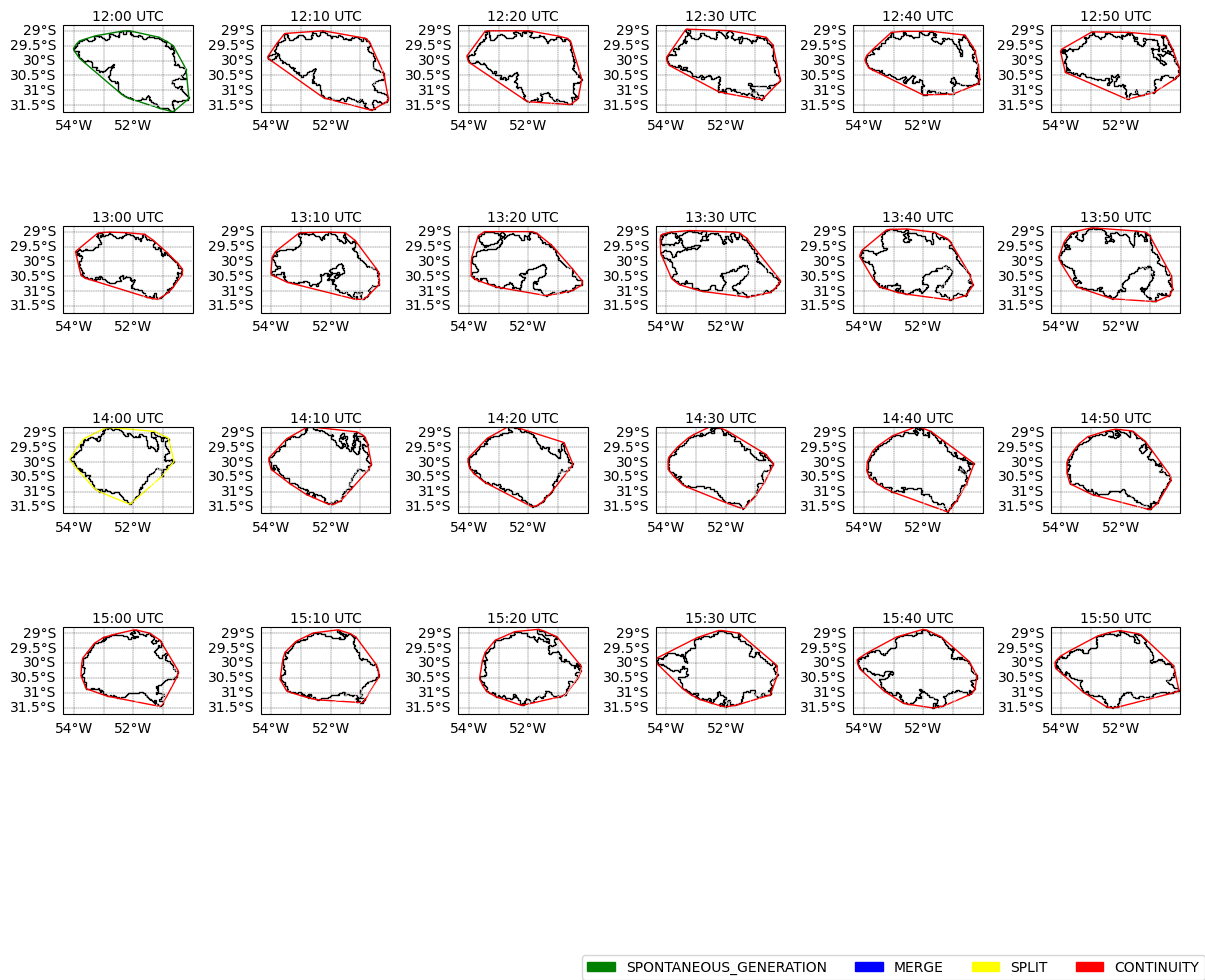

In [26]:
from tathu import visualizer

# Only system
view = visualizer.SystemHistoryView(fam)
view.show()

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


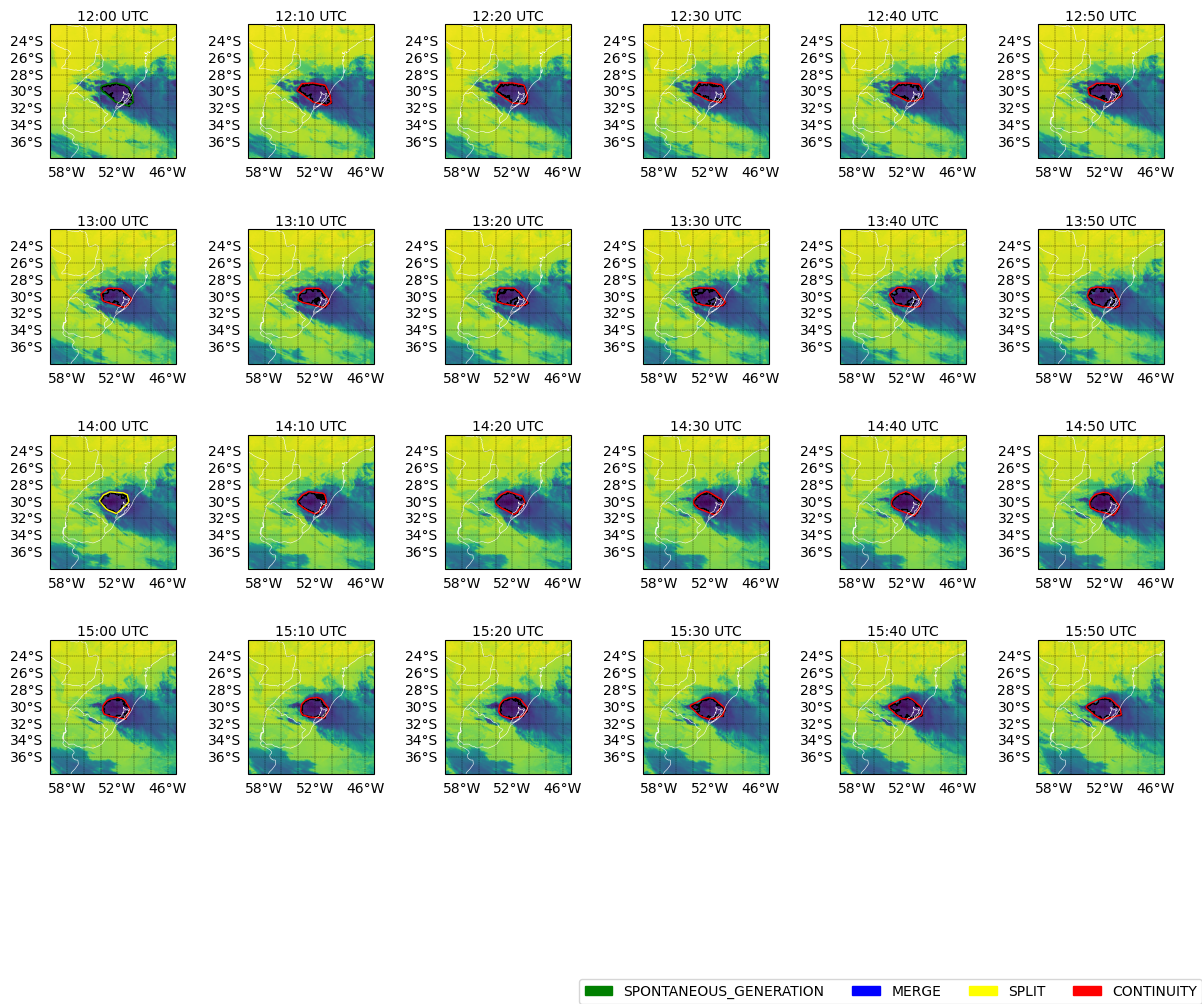

In [ ]:
# System + Images
view = visualizer.SystemHistoryView(fam, grids, extent)
view.show()

Podemos também visualizar, a partir de uma animação, a evolução da temperatura
de brilho mínima e tamanho (em pixels) com a classe `visualizer.AnimationMap()`:

In [ ]:
from matplotlib import rc
rc('animation', html='jshtml')

animation = visualizer.AnimationMap(fam, ['min', 'count'])
plt.close()
animation

Output hidden; open in https://colab.research.google.com to view.

Além das visualizações disponíveis no TATHU, é possível utilizar os dados extraídos para desenvolver outras formas de visualização a partir das informações extraídas. Por exemplo, o código abaixo gera a evolução temporal da Temperatura de Brilho mínima (`min`) e Área (`count`) da família selecionada (`fam`):

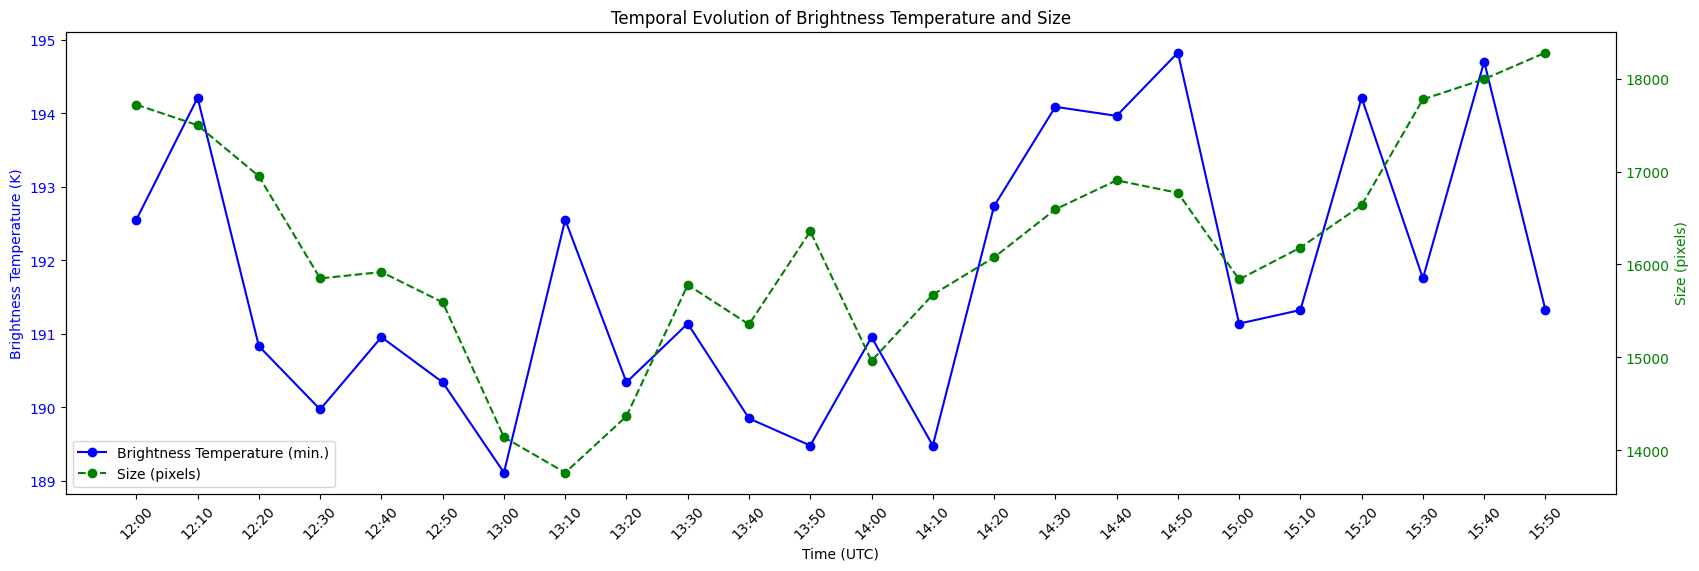

In [27]:
import matplotlib.pyplot as plt

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

time_labels = []
for t in fam.getTimestamps():
  time_labels.append(t.strftime('%H:%M'))

# Plotting the 'min' column on the primary y-axis (ax1)
ax1.plot(fam.getTimestamps(), fam.getAttribute('min'), '-o', label='Brightness Temperature (min.)', color='blue')
ax1.set_xlabel('Time (UTC)')
ax1.set_xticks(fam.getTimestamps())
ax1.set_xticklabels(time_labels, rotation=45)
ax1.set_ylabel('Brightness Temperature (K)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis (ax2) for the 'count' column
ax2 = ax1.twinx()
ax2.plot(fam.getTimestamps(),fam.getAttribute('count'), '--o', label='Size (pixels)', color='green')
ax2.set_ylabel('Size (pixels)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding labels and title
plt.title('Temporal Evolution of Brightness Temperature and Size')

# Displaying the legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=3)

plt.show()

### **Acesssando a Representação Geométrica de Cada Instante de Tempo do SC**

A representação geométrica dos SCs é armazenada na forma de polígonos (`POLYGON`), que podem ser acessados da seguinte forma:

In [ ]:
for system in fam.systems:
  print(system.timestamp, '->', system.geom)

2024-04-30 12:00:20 -> POLYGON ((-52.2482014388489 -28.9932584269663,-52.1223021582734 -28.9932584269663,-52.1223021582734 -29.0112359550562,-52.1043165467626 -29.0112359550562,-52.1043165467626 -29.0292134831461,-52.0863309352518 -29.0292134831461,-52.0863309352518 -29.0651685393258,-52.1043165467626 -29.0651685393258,-52.1043165467626 -29.1011235955056,-52.0863309352518 -29.1011235955056,-52.0863309352518 -29.1370786516854,-52.0503597122302 -29.1370786516854,-52.0503597122302 -29.1011235955056,-52.0323741007194 -29.1011235955056,-52.0323741007194 -29.1191011235955,-52.0143884892086 -29.1191011235955,-52.0143884892086 -29.1550561797753,-51.8705035971223 -29.1550561797753,-51.8705035971223 -29.1730337078652,-51.8525179856115 -29.1730337078652,-51.8525179856115 -29.1910112359551,-51.8345323741007 -29.1910112359551,-51.8345323741007 -29.1550561797753,-51.8525179856115 -29.1550561797753,-51.8525179856115 -29.1370786516854,-51.8345323741007 -29.1370786516854,-51.8345323741007 -29.119101123

### **Função para Visualização de Geometrias**
Vamos definir uma função `plot_geoms` para visualização das geometrias:

In [ ]:
import matplotlib.pyplot as plt

def plot_geoms(geoms, coords=None):
    fig = plt.figure()
    for g in geoms:
        y = []; x = []
        points = g.GetGeometryRef(0).GetPoints()
        for p in points:
            y.append(p[0]); x.append(p[1])
        plt.plot(x, y)
    if coords:
      for p in coords:
        plt.plot(p.GetY(), p.GetX(), 'ro')

Visualizando a geometria do primeiro instante de tempo que o SC foi detectado:

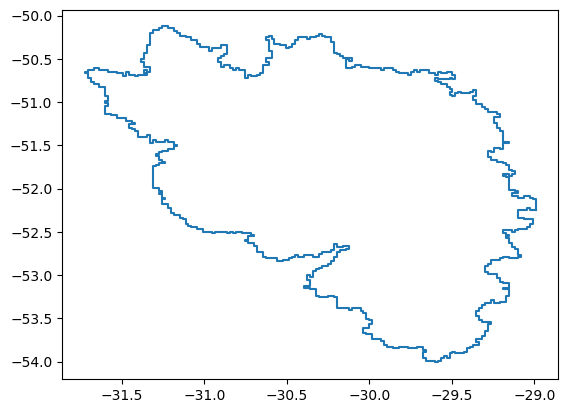

In [ ]:
plot_geoms([fam.systems[0].geom])

Visualizando todas as geometrias do SC:

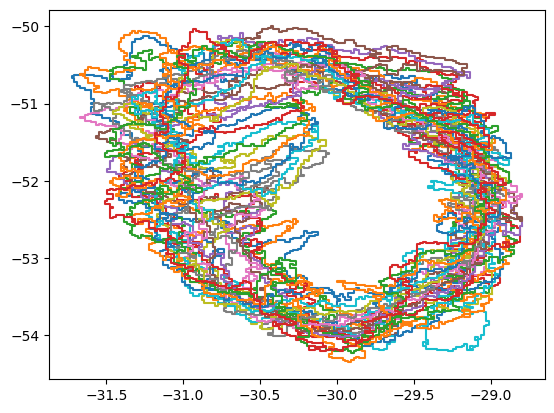

In [ ]:
plot_geoms(fam.getPolygons())

Verificando se uma determinada coordenada está contida nos limites do SC, em um instante de tempo:

Contains!
Does not contain...


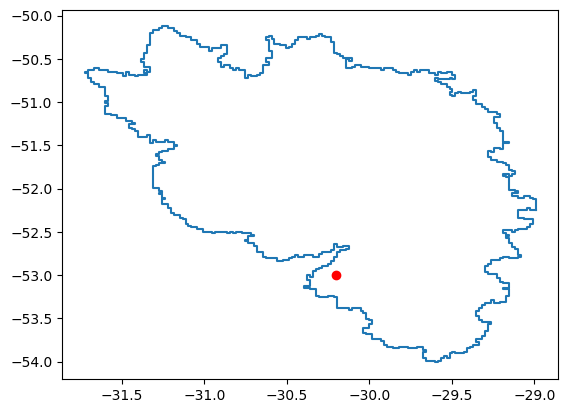

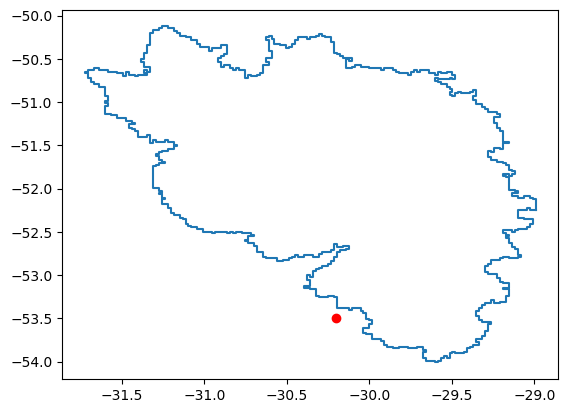

In [ ]:
from osgeo import ogr

# Contains case
coordinate = ogr.Geometry(ogr.wkbPoint)
coordinate.AddPoint(-53.0, -30.20)

system = fam.systems[0]

if system.geom.Contains(coordinate):
  print('Contains!')
else:
  print('Does not contain...')

plot_geoms([fam.systems[0].geom], [coordinate])

# Not Contains case
coordinate = ogr.Geometry(ogr.wkbPoint)
coordinate.AddPoint(-53.5, -30.20)

if system.geom.Contains(coordinate):
  print('Contains!')
else:
  print('Does not contain...')

plot_geoms([fam.systems[0].geom], [coordinate])

# **7° Passo:** Testando uma Previsão

Com base nos dois últimos instantes de tempo desse SC, faremos uma previsão do seu comportamento futuro. Esta operação é realizada pelo TATHU a partir do módulo `tathu.tracking.forecasters`.

Faremos a previsão para 30, 60, 90 e 120 min, utilizando o código abaixo. No gráfico que será gerado, as geometrias em 'laranja' representam as previsões futuras (quanto maior a transparência, maior o tempo de previsão).

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


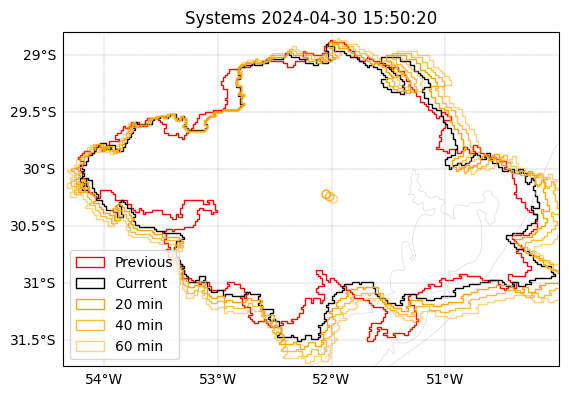

In [ ]:
import matplotlib.patches as mpatches
from tathu.tracking import forecasters

# Get systems (second-to-last and last)
previous, current = fam.systems[-2], fam.systems[-1]
current.relationships.append(previous)

# Forecast
intervals = [20, 40, 60]
f = forecasters.Conservative([previous], intervals=intervals, applyScale=True)
forecasts = f.forecast([current])

# Visualize results
m = MapView(fam.getExtent(), timestamp=str(current.timestamp))
m.plotSystems([previous], facecolor='none', edgecolor='red', centroids=False)
m.plotSystems([current], facecolor='none', edgecolor='black', centroids=False)
alphas = [1, 0.75, 0.5, 0.35]
for t, alpha in zip(forecasts, alphas):
    m.plotSystems(forecasts[t], facecolor='none', edgecolor='orange', alpha=alpha, centroids=True)

# Displaying the legend
patches = []
patches.append(mpatches.Patch(facecolor='none', edgecolor='red', label='Previous'))
patches.append(mpatches.Patch(facecolor='none', edgecolor='black', label='Current'))
for t, alpha in zip(forecasts, alphas):
  patches.append(mpatches.Patch(facecolor='none', edgecolor='orange', alpha=alpha, label='{} min'.format(t)))
plt.legend(handles=patches, loc=3)

m.show()